# Load du lieu len

In [32]:
import sys
sys.path.append('../Common')

import CommonYFinance

symbol = 'VCB.VN'
from_date = '2023-11-01'
to_date = '2024-03-23'
interval = '1d'

data = CommonYFinance.CommonYFinance.loaddataYFinance(symbol, from_date, to_date, interval)

data

[*********************100%%**********************]  1 of 1 completed


Datetime     Open     High      Low    Close   Volume
0  2023-11-01  86800.0  87800.0  86100.0  87800.0  1550100
1  2023-11-02  88000.0  89000.0  86600.0  89000.0  1114500
2  2023-11-03  89000.0  89400.0  88100.0  88900.0  1157600
3  2023-11-06  88900.0  89800.0  88500.0  89500.0   833800
4  2023-11-07  89000.0  89300.0  88300.0  88300.0   518900
..        ...      ...      ...      ...      ...      ...
90 2024-03-18  94300.0  94500.0  92500.0  93000.0  1867500
91 2024-03-19  92500.0  93500.0  92500.0  92500.0  1060100
92 2024-03-20  92500.0  94100.0  92500.0  93200.0   970900
93 2024-03-21  94000.0  95500.0  94000.0  95200.0  1694100
94 2024-03-22  95200.0  96800.0  95200.0  96400.0  1889000

[95 rows x 6 columns]

model = ARIMA(data['Close'], order=(5, 1, 0)): Lệnh này khởi tạo một mô hình ARIMA với dữ liệu đầu vào là cột 'Close' từ DataFrame data. Tham số order=(p, d, q) xác định cấu hình của mô hình, nơi:

p: số lượng lệnh tự hồi quy (AR terms). p = 5 nghĩa là mô hình sẽ xem xét 5 giá trị trước đó trong chuỗi để dự đoán giá trị hiện tại.
d: bậc của phép tích phân (I for Integrated), giúp làm cho chuỗi trở nên dừng. d = 1 chỉ ra rằng dữ liệu nên được chuyển đổi một lần (sử dụng sai phân) để đạt được tính dừng.
q: số lượng lệnh trung bình động (MA terms). q = 0 nghĩa là không có lệnh MA nào được sử dụng trong mô hình.

# Chay mo hinh du doan gia tuong lai

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   95
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -795.032
Date:                Sat, 23 Mar 2024   AIC                           1600.063
Time:                        20:46:59   BIC                           1612.780
Sample:                             0   HQIC                          1605.200
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1046      0.046      2.288      0.022       0.015       0.194
ar.L2         -0.9397      0.043    -21.676      0.000      -1.025      -0.855
ma.L1         -0.0835      0.041     -2.019      0.0

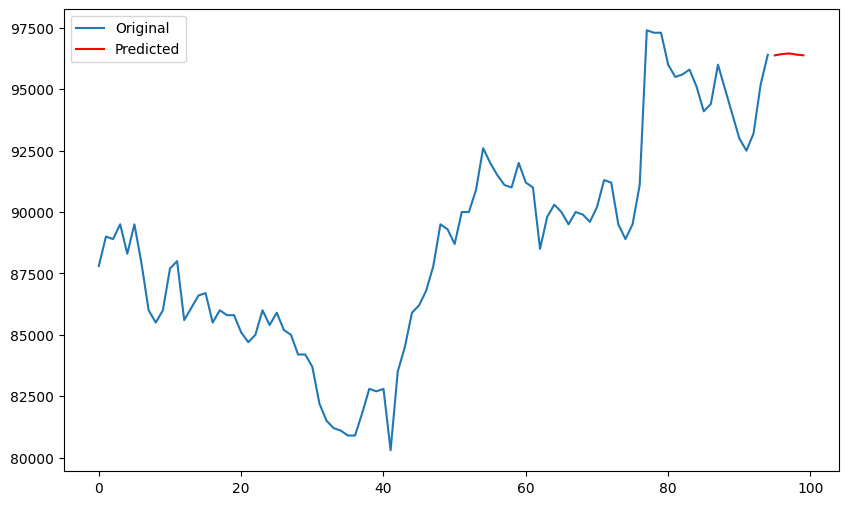

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Giả sử bạn đã có DataFrame `data` với cột 'Close' là giá đóng cửa
# Datetine, Open, High, Low, Close, Volume

# Buoc 1: Xay dung mo hinh
# model = ARIMA(data['Close'], order=(5, 1, 0))  # Ví dụ mô hình ARIMA với tham số (p,d,q)
model = ARIMA(data['Close'], order=(2, 1, 2))  # Ví dụ mô hình ARIMA với tham số (p,d,q)

model_fit = model.fit()
print(model_fit.summary())

# Buoc 2: Kiem tra do chinh xac cua mo hinh
'''Giá trị AIC và BIC càng thấp thì mô hình càng tốt vì nó chỉ ra rằng mô hình có khả năng giải thích dữ liệu cao mà không làm 
cho mô hình trở nên quá phức tạp.'''

# Buoc 3: Dự Đoán và Xác Định Xu Hướng
# Dự đoán giá cả trong tương lai
predictions = model_fit.forecast(steps=5)

# Sử dụng kết quả dự đoán để xác định xu hướng tăng/giảm

# Buoc 4: Trực Quan Hóa Kết Quả
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Original')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()


In [34]:
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA

# Đặt chỉ mục DataFrame với cột 'Datetime' có dữ liệu kiểu datetime
data.set_index('Datetime', inplace=True)

# Buoc 1: Xay dung mo hinh
# model = ARIMA(data['Close'], order=(5, 1, 0))  # Ví dụ mô hình ARIMA với tham số (p,d,q)
model = ARIMA(data['Close'], order=(2, 1, 2))  # Ví dụ mô hình ARIMA với tham số (p,d,q)

model_fit = model.fit()
print(model_fit.summary())

# Buoc 2: Kiem tra do chinh xac cua mo hinh
'''Giá trị AIC và BIC càng thấp thì mô hình càng tốt vì nó chỉ ra rằng mô hình có khả năng giải thích dữ liệu cao mà không làm 
cho mô hình trở nên quá phức tạp.'''

# Buoc 3: Dự Đoán và Xác Định Xu Hướng
# Dự đoán giá cả trong tương lai
predictions = model_fit.forecast(steps=5)

# Sử dụng kết quả dự đoán để xác định xu hướng tăng/giảm

# Buoc 4: Trực Quan Hóa Kết Quả
import plotly.graph_objects as go
# Tạo dãy ngày cho các dự đoán. Giả sử data.index[-1] là ngày cuối cùng trong dữ liệu của bạn
pred_dates = pd.date_range(start=data.index[-1], periods=6, freq='D')  # Thay đổi 'D' thành đơn vị thời gian mong muốn

# Trực Quan Hóa Kết Quả
# Tạo biểu đồ mới với thư viện Plotly
fig = go.Figure()

# Thêm dữ liệu giá đóng cửa gốc vào biểu đồ
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Giá Đóng Cửa Gốc'))

# Thêm dữ liệu dự đoán vào biểu đồ
fig.add_trace(go.Scatter(x=pred_dates, y=predictions, mode='lines+markers', name='Dự Đoán'))

# Định cấu hình layout của biểu đồ
fig.update_layout(
    title='Dự Đoán Giá Cả Sử Dụng Mô Hình ARIMA',
    xaxis_title='Thời Gian',
    yaxis_title='Giá Đóng Cửa',
    hovermode='x unified'
)

# Hiển thị biểu đồ
fig.show()

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   95
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -795.032
Date:                Sat, 23 Mar 2024   AIC                           1600.063
Time:                        20:47:00   BIC                           1612.780
Sample:                             0   HQIC                          1605.200
                                 - 95                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1046      0.046      2.288      0.022       0.015       0.194
ar.L2         -0.9397      0.043    -21.676      0.000      -1.025      -0.855
ma.L1         -0.0835      0.041     -2.019      0.0

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\PC-DELL-CU\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



# Toi uu hoa mo hinh ARIMA voi p, d, q

In [35]:
# import itertools
# import statsmodels.api as sm
# import pandas as pd

# # Đặt chỉ mục DataFrame với cột 'Datetime' có dữ liệu kiểu datetime
# # data.set_index('Datetime', inplace=True) da dat o tren

# # Xác định khoảng giá trị cho tham số p, d, q
# p = d = q = range(0, 6)
# pdq = list(itertools.product(p, d, q))

# best_aic = float("inf")
# best_pdq = None
# best_model = None

# for param in pdq:
#     try:
#         model = sm.tsa.ARIMA(data['Close'], order=param)
#         results = model.fit()
#         if results.aic < best_aic:
#             best_aic = results.aic
#             best_pdq = param
#             best_model = results
#     except:
#         continue

# print(f'Best ARIMA{best_pdq} AIC:{best_aic}')
